## 2차시 _ pandas 기초 복습

#### 수업과 똑같은 파일을 구하지 못해 비슷한 titanic competition - test file 사용
- https://www.kaggle.com/competitions/titanic/data?select=test.csv
- pandas는 dataframe 과 series로 구성된다. 
- 호출 및 csv 부르는 방법은 아래와 같음
- pandas를 통해 여러 데이터를 추출할 수 있음

### pandas와 numpy 차이
- numpy는 기본데이터 구조ㅓ가 array. 배열, 수치 계산에 더 용이
- pandas는 데이터프레임과 시리즈를 바탕으로 1차원 배열(행렬)구조를 분석할 수 있는 라이브러리. 슬라이싱, 필터링, 그룹화, 결측치 처리, 시각화 등에 용이하다.즉, 테이블 데이터 연산에 더 유리한 라이브러리임

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
file =  './titanic_test.csv'
tt = pd.read_csv(file,encoding = 'cp949')

tt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print('칼럼의 타입은' ,type(tt.Age),'즉, 시리즈입니다')
print('열의 내용 보기')
print(tt.Age)

칼럼의 타입은 <class 'pandas.core.series.Series'> 즉, 시리즈입니다
열의 내용 보기
0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


In [4]:
tt['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [10]:
# 컬럼보기
tt.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
##shape로 행과 열의 개수 보기
print(tt.shape)
print(tt.shape[0],'개의 행과', tt.shape[1],'개의 열이 있습니다.')

(418, 11)
418 개의 행과 11 개의 열이 있습니다.


In [15]:
tt_col=list(tt.columns)
tt_col

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### info로 알 수 있는 값
- 418개의 범위 인덱스. 0~417번까지 있음
- Dtype으로 데이터 타입 알 수 있음(int,float,str 등)
- 각 열의 null값 개수. Age와 Cabin의 경우 각각 332, 91개로 결측값이 많은 것을 알 수 있음

In [16]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
#자료값 확인이 가능
tt.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# 평균, 분산, count, min,max 등을 보여주는 describe
tt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# 분산, 아웃라이어 등 더 자세한 모든 값을 볼 수 있는 describe(include = 'all')
tt.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Hellstrom, Miss. Hilda Maria",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [25]:
# head 와 tail을 활용하여 데이터를 추출할 수 있음. default는 5개
tt.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [28]:
tt.tail(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 데이터 프레임 활용하여 접근하기
- 기본적으로 행렬로 구성되어있음
- SQL과 비슷하게 쿼리를 섬세하게 던질 수록 원하는 데이터를 추출하고 정리할 수 있다

In [30]:
# column 하나 호출
tt['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [31]:
#여러개 호출하고 싶을 시
tt[['Age','Name','Sex']]

,Age,Name,Sex
0,34.5,"Kelly, Mr. James",male
1,47.0,"Wilkes, Mrs. James (Ellen Needs)",female
2,62.0,"Myles, Mr. Thomas Francis",male
3,27.0,"Wirz, Mr. Albert",male
4,22.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
...,...,...,...
413,NaN,"Spector, Mr. Woolf",male
414,39.0,"Oliva y Ocana, Dona. Fermina",female
415,38.5,"Saether, Mr. Simon Sivertsen",male
416,NaN,"Ware, Mr. Frederick",male


In [33]:
# 해당 조건을 변수화해서 넣기도 가능하다
condition = tt[['Age', 'Name', 'Sex']]
print(condition)

      Age                                          Name     Sex
0    34.5                              Kelly, Mr. James    male
1    47.0              Wilkes, Mrs. James (Ellen Needs)  female
2    62.0                     Myles, Mr. Thomas Francis    male
3    27.0                              Wirz, Mr. Albert    male
4    22.0  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female
..    ...                                           ...     ...
413   NaN                            Spector, Mr. Woolf    male
414  39.0                  Oliva y Ocana, Dona. Fermina  female
415  38.5                  Saether, Mr. Simon Sivertsen    male
416   NaN                           Ware, Mr. Frederick    male
417   NaN                      Peter, Master. Michael J    male

[418 rows x 3 columns]


### loc 과 iloc의 차이
- iloc은 컬럼을 찾을 때 꼭 숫자로 넣기
- 가장 결정적인 차이는 iloc은 리인덱싱함!
- :2로 두칸 씩 뛸 때 0,2,4로 가는 상황이라면
    - loc은 0,2,4,6으로 찾아야함
    - iloc은 0,1,2,3으로 찾아야함(리인덱싱)

In [38]:
#tt.loc과 tt.iloc이 불러오는 값은 차이가 없다
print(tt.loc[0])
print()
print("======== iloc찾기 ===============")
print()
print(tt.iloc[0])

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

======== iloc찾기 ===============

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object


#### 마지막 값을 불러올 때
- loc은 -1을 인식하지 못한다. 때문에 마지막 값을 추출해서 -1하는 구조로 가져와야함
- iloc은 -1가능

In [40]:
tt.iloc[-1]

PassengerId                        1309
Pclass                                3
Name           Peter, Master. Michael J
Sex                                male
Age                                 NaN
SibSp                                 1
Parch                                 1
Ticket                             2668
Fare                            22.3583
Cabin                               NaN
Embarked                              C
Name: 417, dtype: object

In [43]:
# tt.loc[-1] _ error
# 행의 개수를 가져온다
num_row = tt.shape[0]
last_idx = num_row - 1
tt.loc[last_idx]

PassengerId                        1309
Pclass                                3
Name           Peter, Master. Michael J
Sex                                male
Age                                 NaN
SibSp                                 1
Parch                                 1
Ticket                             2668
Fare                            22.3583
Cabin                               NaN
Embarked                              C
Name: 417, dtype: object

In [44]:
#iloc에도 적용가능
tt.iloc[last_idx]

PassengerId                        1309
Pclass                                3
Name           Peter, Master. Michael J
Sex                                male
Age                                 NaN
SibSp                                 1
Parch                                 1
Ticket                             2668
Fare                            22.3583
Cabin                               NaN
Embarked                              C
Name: 417, dtype: object

In [45]:
# 변수를 다로 할당하여 추출도 가능하다
a = 30
tt.loc[a]

PassengerId                             922
Pclass                                    2
Name           Louch, Mr. Charles Alexander
Sex                                    male
Age                                      50
SibSp                                     1
Parch                                     0
Ticket                           SC/AH 3085
Fare                                     26
Cabin                                   NaN
Embarked                                  S
Name: 30, dtype: object

#### 여러행을 추출하고 싶다면?
- [[추,출,하,고,싶,은,숫,자,입,력]]

In [46]:
tt.loc[[1,3,2,6,30]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
30,922,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S


In [47]:
tt.iloc[[10,13,2,50]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
13,905,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S


### 슬라이싱으로 확인해보는 loc과 iloc 차이

In [48]:
tt.loc[::]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [52]:
a = tt.loc[:20:4]
tt.loc[:20:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C


In [51]:
tt.iloc[:20:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q


In [53]:
# loc으로추출한거에서 idx[1]을 추출해오는 것을 확인할 수 있다
a.iloc[1]

PassengerId                                             896
Pclass                                                    3
Name           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Sex                                                  female
Age                                                      22
SibSp                                                     1
Parch                                                     1
Ticket                                              3101298
Fare                                                12.2875
Cabin                                                   NaN
Embarked                                                  S
Name: 4, dtype: object

In [55]:
# iloc은 아래와 같이 column명으로 추출하기가 불가능하다. 리인덱싱하기 때문
tt.loc[::,['Sex']]

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


In [58]:
tt.loc[:10:,['Fare','Sex','Name']]

,Fare,Sex,Name
0,7.8292,male,"Kelly, Mr. James"
1,7.0000,female,"Wilkes, Mrs. James (Ellen Needs)"
2,9.6875,male,"Myles, Mr. Thomas Francis"
3,8.6625,male,"Wirz, Mr. Albert"
4,12.2875,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
5,9.2250,male,"Svensson, Mr. Johan Cervin"
6,7.6292,female,"Connolly, Miss. Kate"
7,29.0000,male,"Caldwell, Mr. Albert Francis"
8,7.2292,female,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
9,24.1500,male,"Davies, Mr. John Samuel"


In [59]:
#iloc은 이렇게
b = tt.loc[:10:,['Fare','Sex','Name']]
# 위의 표에서 0,2번째 컬럼인 fare와 Name만 추출
b.iloc[::,[0,2]]

,Fare,Name
0,7.8292,"Kelly, Mr. James"
1,7.0000,"Wilkes, Mrs. James (Ellen Needs)"
2,9.6875,"Myles, Mr. Thomas Francis"
3,8.6625,"Wirz, Mr. Albert"
4,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
5,9.2250,"Svensson, Mr. Johan Cervin"
6,7.6292,"Connolly, Miss. Kate"
7,29.0000,"Caldwell, Mr. Albert Francis"
8,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)"
9,24.1500,"Davies, Mr. John Samuel"


In [62]:
# -1로도 추출가능
tt.iloc[::,[3,1,-1]]

,Sex,Pclass,Embarked
0,male,3,Q
1,female,3,S
2,male,2,Q
3,male,3,S
4,female,3,S
...,...,...,...
413,male,3,S
414,female,1,C
415,male,3,S
416,male,3,S


#### range를 활용하여 데이터 추출해보기

In [67]:
num_3 = list(range(0,100,5))

In [68]:
tt.loc[num_3]['Embarked']

0     Q
5     S
10    S
15    C
20    C
25    S
30    S
35    C
40    C
45    S
50    S
55    Q
60    S
65    S
70    Q
75    C
80    C
85    C
90    S
95    S
Name: Embarked, dtype: object

In [74]:
# 반대로 찾기 및 응용
tt_sp = tt[['Name','Sex','Embarked','Fare']]
tt_sp

,Name,Sex,Embarked,Fare
0,"Kelly, Mr. James",male,Q,7.8292
1,"Wilkes, Mrs. James (Ellen Needs)",female,S,7.0000
2,"Myles, Mr. Thomas Francis",male,Q,9.6875
3,"Wirz, Mr. Albert",male,S,8.6625
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,S,12.2875
...,...,...,...,...
413,"Spector, Mr. Woolf",male,S,8.0500
414,"Oliva y Ocana, Dona. Fermina",female,C,108.9000
415,"Saether, Mr. Simon Sivertsen",male,S,7.2500
416,"Ware, Mr. Frederick",male,S,8.0500


In [80]:
# 여자들 이름 추출
temp = []
for index,p in tt_sp.iterrows():
    if p['Sex'] == 'female' :
        temp.append(p['Name'])
print(temp)

['Wilkes, Mrs. James (Ellen Needs)', 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)', 'Connolly, Miss. Kate', 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)', 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)', 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)', 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)', 'Ilmakangas, Miss. Ida Livija', 'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Flegenheim, Mrs. Alfred (Antoinette)', 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)', 'Ostby, Miss. Helene Ragnhild', 'Dean, Mrs. Bertram (Eva Georgetta Light)', 'Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"', 'Roth, Miss. Sarah A', 'Cacic, Miss. Manda', 'Corbett, Mrs. Walter H (Irene Colvin)', 'Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)', 'Bucknell, Mrs. William Robert (Emma Eliza Ward)', 'Coutts, Mrs. William (Winnie Minnie" Treanor)"', 'Hocking, Miss. Ellen Nellie""', 'Fortune, Miss. Ethel Flora', 'Chaudanson, Miss. Victorine', 'Bradley, Miss. Bridget Delia', 'Corey, Mrs. Percy C (Mary Phyl

In [88]:
 tt[['Name','Sex','Fare']].loc[:5]

,Name,Sex,Fare
0,"Kelly, Mr. James",male,7.8292
1,"Wilkes, Mrs. James (Ellen Needs)",female,7.0000
2,"Myles, Mr. Thomas Francis",male,9.6875
3,"Wirz, Mr. Albert",male,8.6625
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,12.2875
5,"Svensson, Mr. Johan Cervin",male,9.2250


In [91]:
#원하는 값 추출하기
tt[['Embarked','Sex']].loc[:5]['Sex']

0      male
1    female
2      male
3      male
4    female
5      male
Name: Sex, dtype: object

### 기초 통계치 응용하여 분석하기

In [4]:
print("평균: ", tt.Fare.mean())
print("중위값: ", tt.Fare.median())

평균:  35.6271884892086
중위값:  14.4542


In [5]:
#numpy로 뽑아보기
print("평균:", np.mean(tt.Fare))
print("표준편차:", np.std(tt.Fare))
print("sum: ", np.sum(tt.Fare))
print("최댓값 인덱스", np.argmax(tt.Fare))
print("최솟값 인덱스", np.argmin(tt.Fare))

평균: 35.6271884892086
표준편차: 55.84050047954103
sum:  14856.5376
최댓값 인덱스 343
최솟값 인덱스 266


### groupby활용하여 데이터 뽑기
- 데이터 기준으로 묶어 피봇테이블처럼 쓰기 가능
- groupby('그룹을 묶을 컬럼')['통계치를 볼 컬럼'].원하는통계치

In [7]:
tt.groupby('Name')['Sex'].sum()

Name
Abbott, Master. Eugene Joseph                      male
Abelseth, Miss. Karen Marie                      female
Abelseth, Mr. Olaus Jorgensen                      male
Abrahamsson, Mr. Abraham August Johannes           male
Abrahim, Mrs. Joseph (Sophie Halaut Easu)        female
                                                  ...  
de Brito, Mr. Jose Joaquim                         male
de Messemaeker, Mr. Guillaume Joseph               male
del Carlo, Mrs. Sebastiano (Argenia Genovesi)    female
van Billiard, Master. James William                male
van Billiard, Master. Walter John                  male
Name: Sex, Length: 418, dtype: object

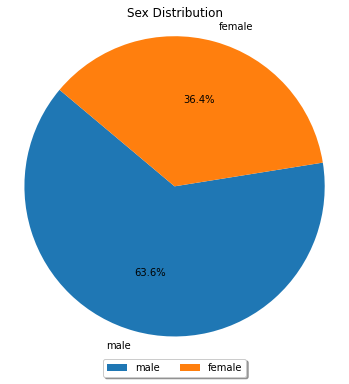

In [16]:
sex_counts = tt['Sex'].value_counts()

# 파이 그래프 그리기
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')  # 파이 그래프를 원형으로 만듭니다.
# 항목 이름을 슬라이스 아래에 표시
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
plt.show()

In [9]:
# 여자가 훨씬 적은데 운임이 훨씬 많은걸 알 수 있음
tt.groupby('Sex')['Fare'].sum()

Sex
female    7561.6502
male      7294.8874
Name: Fare, dtype: float64

In [12]:
# 훨씬 적은 수임에도 여성의 승선 등급이 높은 걸 알 수 있음
tt.groupby('Sex')['Pclass'].mean()

Sex
female    2.144737
male      2.334586
Name: Pclass, dtype: float64

In [19]:
tt.groupby('Embarked')['Fare','Age'].mean()

C:\Users\bestl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Fare,Age
Embarked,,
C,66.259765,34.737805
Q,10.957700,29.318182
S,28.230436,28.758772


In [21]:
tt.groupby('Embarked')[['Pclass','Fare']].mean()

,Pclass,Fare
Embarked,,
C,1.794118,66.259765
Q,2.869565,10.957700
S,2.340741,28.230436


In [24]:
tt.groupby('Sex')[['Pclass','Fare']].median()

,Pclass,Fare
Sex,,
female,2,21.5125
male,3,13.0000
